In [57]:
# Data management
import pandas as pd
import pickle

# Data preprocessing and trasformation (ETL)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml, load_iris, make_moons, make_classification


# Math and Stat modules
import numpy as np
from scipy.stats import sem, randint
from random import choice

# Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve, cross_validate
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Hyperparameter Optimization
#from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.fixes import loguniform


# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.tree import export_graphviz
%matplotlib inline

#ANN DNN
import tensorflow
from tensorflow import keras
from scikeras.wrappers import KerasClassifier, KerasRegressor
from scipy.stats import reciprocal

In [2]:
# carico i dati già preparati
X = pickle.load(open(r'C:/Users/lucam/Documents/master/feature_matrix.pickle','rb'))
y  = pickle.load(open(r'C:/Users/lucam/Documents/master/employee_label.pickle','rb'))
columns_name  = pickle.load(open(r'C:/Users/lucam/Documents/master/columns_name.pickle','rb'))

In [98]:
#definisco funzione per valutare le performance
def scores_val(y_train, y_train_pred):
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    
    dict= {"Accuracy": accuracy, 
    "Precision": precision,
    "Recall" : recall,
    "F1" : f1}
    
    return dict    

In [5]:
# train test split con dimensione test 0.2
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state= 225)

In [6]:
# train validation split con dimensione validation 0.2
X_valid, X_train, y_valid, y_train = train_test_split (X_train_full, y_train_full, test_size = 0.2, random_state= 225)

# 1. Artificial Neural Network

- utilizzo un modello di rete neurale di tipo sequenziale
- 4 hidden layers con activation function "relu"
- activation function per output layer di tipo sigmoid (perchè si tratta di un modello binario)
- si valuta come loss la binary cross entropy
- si addestra su 100 epoche

In [73]:
model0 = keras.models.Sequential([
    keras.layers.Dense(55, activation="relu", input_shape= X_train.shape[1:]),
    keras.layers.Dense(55, activation="relu"),
    keras.layers.Dense(55, activation="relu"),
    keras.layers.Dense(55, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model0.compile(loss = 'binary_crossentropy',
              optimizer = 'sgd',
              metrics =  ['accuracy'],
             )

history0 = model0.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    batch_size = 32
                   )


Epoch 1/100
24/24 [==============================] - 1s 22ms/step - loss: 0.6746 - accuracy: 0.6779 - val_loss: 0.6702 - val_accuracy: 0.6517
Epoch 2/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6579 - accuracy: 0.6779 - val_loss: 0.6590 - val_accuracy: 0.6517
Epoch 3/100
24/24 [==============================] - 0s 11ms/step - loss: 0.6458 - accuracy: 0.6779 - val_loss: 0.6513 - val_accuracy: 0.6517
Epoch 4/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6368 - accuracy: 0.6779 - val_loss: 0.6456 - val_accuracy: 0.6517
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 0.6299 - accuracy: 0.6779 - val_loss: 0.6417 - val_accuracy: 0.6517
Epoch 6/100
24/24 [==============================] - 0s 11ms/step - loss: 0.6247 - accuracy: 0.6779 - val_loss: 0.6391 - val_accuracy: 0.6517
Epoch 7/100
24/24 [==============================] - 0s 11ms/step - loss: 0.6209 - accuracy: 0.6779 - val_loss: 0.6377 - val_accuracy: 0.6517
Epoch 

- si può notare un po' di overfitting: circa 3 punti percentuali
- la loss continua sempre a diminuire

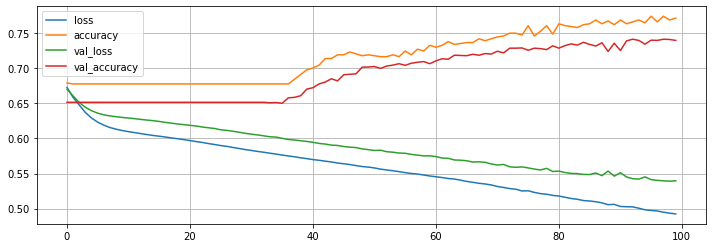

In [34]:
pd.DataFrame(history0.history).plot(figsize=(12,4))
plt.grid(True)

In [77]:
model0.evaluate(X_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7164


[0.5656659007072449, 0.7164339423179626]

- dalla history delle epoche notiamo che i valori di loss e accuracy tendono a scendere con il trascorrere delle epoche
- rimane molto overfitting, tende ad aumentare per la loss
- in test le performance diminuiscono

In [99]:
y_pred = model0.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)
ANN_4hl=scores_val(y_test, y_pred)

## 1.1 Modello più semplice

In [44]:
# modello più semplice
model1 = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape= X_train.shape[1:]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [45]:
# solo 1071 parametri in confronto ai circa 9000 del modello precedente
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 50)                550       
                                                                 
 dense_28 (Dense)            (None, 10)                510       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,071
Trainable params: 1,071
Non-trainable params: 0
_________________________________________________________________


In [48]:
# misuro accuracy binaria
model1.compile(loss = 'binary_crossentropy',
              optimizer = 'sgd',
              metrics =  ['binary_accuracy'],
             )
print(X_train.shape, X_valid.shape)
history1 = model1.fit(X_train, y_train,
          epochs=50,
          validation_data=(X_valid,y_valid),
          batch_size = 32
         )

(745, 10) (2977, 10)
Epoch 1/50
24/24 [==============================] - 1s 16ms/step - loss: 0.5200 - binary_accuracy: 0.7597 - val_loss: 0.5612 - val_binary_accuracy: 0.7269
Epoch 2/50
24/24 [==============================] - 0s 13ms/step - loss: 0.5139 - binary_accuracy: 0.7664 - val_loss: 0.5545 - val_binary_accuracy: 0.7370
Epoch 3/50
24/24 [==============================] - 0s 14ms/step - loss: 0.5134 - binary_accuracy: 0.7638 - val_loss: 0.5616 - val_binary_accuracy: 0.7282
Epoch 4/50
24/24 [==============================] - 0s 13ms/step - loss: 0.5128 - binary_accuracy: 0.7584 - val_loss: 0.5523 - val_binary_accuracy: 0.7380
Epoch 5/50
24/24 [==============================] - 0s 13ms/step - loss: 0.5119 - binary_accuracy: 0.7718 - val_loss: 0.5528 - val_binary_accuracy: 0.7293
Epoch 6/50
24/24 [==============================] - 0s 9ms/step - loss: 0.5082 - binary_accuracy: 0.7678 - val_loss: 0.5479 - val_binary_accuracy: 0.7360
Epoch 7/50
24/24 [==============================] 

- modello più semplice sembra avere accuracy maggiore
- rimane l'overfitting
- loss in validation più alto

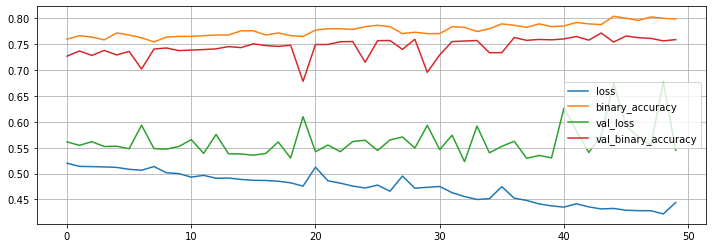

In [49]:
pd.DataFrame(history1.history).plot(figsize=(12,4))
plt.grid(True)

- le performance sembrano oscillare molto
- rimane molto overfitting

In [50]:
model1.evaluate(X_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.5520 - binary_accuracy: 0.7379


[0.5519964694976807, 0.7379162311553955]

- loss in test rimane alto
- accuracy migliore rispetto al primo modello

In [100]:
y_pred = model1.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)
ANN_2hl=scores_val(y_test, y_pred)

## 1.2 Ottimizzazione degli iperparametri

In [55]:
# definizione funzione per costruire modello
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=X_train.shape[1:]):
    model = keras.models.Sequential() # sequenza vuota
    model.add(keras.layers.InputLayer(input_shape=input_shape)) 
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu")) 
    model.add(keras.layers.Dense(1)) 
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics =  ['accuracy'])
    return model

In [58]:
keras_reg = KerasRegressor(build_model)

In [60]:
# grid search su i vari iperparametri
param_distribs = {
    "model__n_hidden": [0, 1, 2, 3, 4, 5],
    "model__n_neurons": np.arange(1, 100),
    "optimizer__learning_rate": reciprocal(3e-4, 3e-1),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=50, cv=3, verbose = 2)
rnd_search_cv.fit(X_train, y_train, epochs=30,verbose = 0)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
8/8 [==============================] - 0s 2ms/step
[CV] END model__n_hidden=1, model__n_neurons=2, optimizer__learning_rate=0.008314106568844815; total time=   1.8s
8/8 [==============================] - 0s 2ms/step
[CV] END model__n_hidden=1, model__n_neurons=2, optimizer__learning_rate=0.008314106568844815; total time=   1.8s
8/8 [==============================] - 0s 2ms/step
[CV] END model__n_hidden=1, model__n_neurons=2, optimizer__learning_rate=0.008314106568844815; total time=   1.8s
8/8 [==============================] - 0s 2ms/step
[CV] END model__n_hidden=0, model__n_neurons=73, optimizer__learning_rate=0.19861527828344375; total time=   1.7s
8/8 [==============================] - 0s 2ms/step
[CV] END model__n_hidden=0, model__n_neurons=73, optimizer__learning_rate=0.19861527828344375; total time=   1.8s
8/8 [==============================] - 0s 2ms/step
[CV] END model__n_hidden=0, model__n_neurons=73, optimizer__le

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(model=<function build_model at 0x0000024C1BC9DDC0>),
                   n_iter=50,
                   param_distributions={'model__n_hidden': [0, 1, 2, 3, 4, 5],
                                        'model__n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'optimizer__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C1F40AC70>},
                   verbose=2)

In [61]:
# modello consigliato con loss inferiore
rnd_search_cv.best_params_, rnd_search_cv.best_score_

({'model__n_hidden': 3,
  'model__n_neurons': 94,
  'optimizer__learning_rate': 0.027780612406397214},
 0.13026689208260503)

In [63]:
# implemento il modello consigliato
model = keras.models.Sequential([
    keras.layers.Dense(94, activation="relu", input_shape= X_train.shape[1:]),
    keras.layers.Dense(94, activation="relu"),
    keras.layers.Dense(94, activation="relu"),    
    keras.layers.Dense(1)
])

model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.03487300576203567),
              metrics =  ['accuracy'],
             )

print(X_train.shape, X_valid.shape)
history = model.fit(X_train, y_train,
          epochs=50,
          validation_data=(X_valid,y_valid),
          batch_size = 32
         )

(745, 10) (2977, 10)
Epoch 1/50
24/24 [==============================] - 1s 20ms/step - loss: 1.0086 - accuracy: 0.6591 - val_loss: 0.6213 - val_accuracy: 0.6755
Epoch 2/50
24/24 [==============================] - 0s 10ms/step - loss: 0.6067 - accuracy: 0.6819 - val_loss: 0.5943 - val_accuracy: 0.6816
Epoch 3/50
24/24 [==============================] - 0s 10ms/step - loss: 0.5625 - accuracy: 0.7369 - val_loss: 0.5720 - val_accuracy: 0.7346
Epoch 4/50
24/24 [==============================] - 0s 11ms/step - loss: 0.5610 - accuracy: 0.7409 - val_loss: 0.5551 - val_accuracy: 0.7299
Epoch 5/50
24/24 [==============================] - 0s 10ms/step - loss: 0.5411 - accuracy: 0.7557 - val_loss: 0.8410 - val_accuracy: 0.4095
Epoch 6/50
24/24 [==============================] - 0s 11ms/step - loss: 0.5679 - accuracy: 0.7235 - val_loss: 0.5567 - val_accuracy: 0.7373
Epoch 7/50
24/24 [==============================] - 0s 11ms/step - loss: 0.5277 - accuracy: 0.7463 - val_loss: 0.5577 - val_accuracy:

- le performance non sono delle migliori e c'è molto overfitting

# 2. Deep Neural Network 

In [64]:
# utilizzo una funzione di attivazione LeakyRelu
model = keras.models.Sequential([
    keras.layers.Dense(55, kernel_initializer="he_normal", input_shape= X_train.shape[1:]), 
    keras.layers.LeakyReLU(),
    keras.layers.Dense(55, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid))

Epoch 1/100
24/24 [==============================] - 1s 29ms/step - loss: 0.6603 - accuracy: 0.6470 - val_loss: 0.6825 - val_accuracy: 0.6315
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6545 - accuracy: 0.6523 - val_loss: 0.6781 - val_accuracy: 0.6318
Epoch 3/100
24/24 [==============================] - 0s 11ms/step - loss: 0.6496 - accuracy: 0.6564 - val_loss: 0.6742 - val_accuracy: 0.6389
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 0.6454 - accuracy: 0.6685 - val_loss: 0.6709 - val_accuracy: 0.6412
Epoch 5/100
24/24 [==============================] - 0s 10ms/step - loss: 0.6417 - accuracy: 0.6711 - val_loss: 0.6681 - val_accuracy: 0.6406
Epoch 6/100
24/24 [==============================] - 0s 10ms/step - loss: 0.6386 - accuracy: 0.6698 - val_loss: 0.6654 - val_accuracy: 0.6436
Epoch 7/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6357 - accuracy: 0.6752 - val_loss: 0.6629 - val_accuracy: 0.6446
Epoch 8

- le performance sembrano peggiorare rispetto alle altre reti neurali

In [71]:
# provo ad addestrare un modello con 100 hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Dense(55, activation="relu", input_shape= X_train.shape[1:]))
for layer in range(99):
    model.add(keras.layers.Dense(55, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
24/24 [==============================] - 7s 74ms/step - loss: 0.6866 - accuracy: 0.6779 - val_loss: 0.6811 - val_accuracy: 0.6517
Epoch 2/50
24/24 [==============================] - 1s 31ms/step - loss: 0.6732 - accuracy: 0.6779 - val_loss: 0.6715 - val_accuracy: 0.6517
Epoch 3/50
24/24 [==============================] - 1s 29ms/step - loss: 0.6629 - accuracy: 0.6779 - val_loss: 0.6643 - val_accuracy: 0.6517
Epoch 4/50
24/24 [==============================] - 1s 31ms/step - loss: 0.6548 - accuracy: 0.6779 - val_loss: 0.6591 - val_accuracy: 0.6517
Epoch 5/50
24/24 [==============================] - 1s 31ms/step - loss: 0.6487 - accuracy: 0.6779 - val_loss: 0.6550 - val_accuracy: 0.6517
Epoch 6/50
24/24 [==============================] - 1s 32ms/step - loss: 0.6438 - accuracy: 0.6779 - val_loss: 0.6524 - val_accuracy: 0.6517
Epoch 7/50
24/24 [==============================] - 1s 34ms/step - loss: 0.6404 - accuracy: 0.6779 - val_loss: 0.6505 - val_accuracy: 0.6517
Epoch 8/50
24

In [66]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 6ms/step - loss: 0.6469 - accuracy: 0.6531


[0.6469287872314453, 0.6530612111091614]

- le performance peggiorano si raggiungono i livelli di accuracy del percettrone
- probabilmente le reti neurali non sono le più indicate per questo modello

# 3. Confronto

In [84]:
# train test split con dimensione test 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 225)

In [85]:
# confronto tra i migliori di ogni algoritmo 
p = Perceptron()
logit= LogisticRegression(max_iter=1000)
lin_SVM = LinearSVC(C=100, max_iter=500000)
SVM_rbf= SVC(kernel="rbf", gamma = 0.1, C = 100)
SVM_2 = SVC(kernel="poly", degree=2, gamma = 0.1, C = 1000 )
svm_3_clf = SVC(kernel="poly", degree=3, C = 1000 )
dtc = DecisionTreeClassifier(min_samples_leaf=20, random_state=225, max_depth=15)
bag_dec = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf= 20, random_state=225,max_depth=15), n_estimators=500, max_samples=1000, bootstrap=True, n_jobs=-1)
rnf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=32, max_features=4, random_state=225)
brnf = BalancedRandomForestClassifier(n_estimators=250, max_leaf_nodes=32, max_features=4, random_state=225)
etc = ExtraTreesClassifier(n_estimators=250, max_leaf_nodes=32, max_features=4, random_state=225)
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=100, algorithm='SAMME.R', learning_rate=0.2)
knc = KNeighborsClassifier(n_neighbors = 10)


clfs = {
    'Perceptron': p,
    'Logistic Regression': logit,
    'Linear SVM':lin_SVM,
    'SVM rbf': SVM_rbf,
    'SVM degree 2': SVM_2,
    'SVM degree 3': svm_3_clf,
    'Decision Tree': dtc,
    'Bagging Classifier': bag_dec, 
    'Random Forest': rnf,
    'Balanced Random Forest': brnf,
    'Extra Trees Classifier': etc,
    'Ada Boost Classifier': ab,
    'KNN' : knc
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    return accuracy,precision, recall, f1

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision, current_recall, current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)


In [110]:
# creiamo dataframe aggiungendo anche le due reti neurali valutate precedentemente
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall': recall_scores, 'F1': f1_scores})
ANN_2hl.update(Algorithm='ANN_2hl')
ANN_4hl.update(Algorithm='ANN_4hl')
performance_df=performance_df.append(ANN_2hl, ignore_index = True)
performance_df=performance_df.append(ANN_4hl, ignore_index = True)
performance_df.sort_values('Accuracy',ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1
8,Random Forest,0.839957,0.902778,0.603715,0.723562
10,Extra Trees Classifier,0.832438,0.937173,0.554180,0.696498
5,SVM degree 3,0.830290,0.854077,0.616099,0.715827
6,Decision Tree,0.830290,0.828685,0.643963,0.724739
7,Bagging Classifier,0.830290,0.873303,0.597523,0.709559
3,SVM rbf,0.827068,0.829268,0.631579,0.717047
9,Balanced Random Forest,0.825994,0.784452,0.687307,0.732673
4,SVM degree 2,0.814178,0.864078,0.551084,0.672968
11,Ada Boost Classifier,0.807734,0.774809,0.628483,0.694017
12,KNN,0.781955,0.815789,0.479876,0.604288


- Confronto delle performance sul test set
- Random forest ha accuracy migliore
- Extra trees migliore per precision
- Balanced Random forest ha recall migliore e anche f1_score

# 4. Conclusioni
- Se dovessimo trasformare queste valutazioni in decisioni aziendali si potrebbero ipotizzare 2 scenari:
    - Ipotizzando che l'azienda in questione abbia fondi limitati e voglia individuare i dipendenti che abbandoneranno la società per investire su di loro per dissuaderli, sarebbe auspicabile avere una **precision** più elevata, minimizzando i falsi positivi. In questo modo sono più sicuro di investire su i dipendenti che effettivamente se ne sarebbero andati (ipotesi probabile).
    - Ipotizzando invece che l'azienda abbia molti fondi a disposizione e grande difficoltà a rimpiazzare i dipendenti, a questo punto l'azienda vorrebbe individuare il maggior numero di dipendenti che se andranno per dissuaderli. In questo caso sarebbe meglio avere una **recall** più elevata (ipotesi meno probabile).
***

- Complessivamente l'algoritmo con le performance migliori in generale è ***Random Forest***, ovvero quello che non conoscendo la natura del problema avrebbe delle buone performance in ogni caso.

In [116]:
voting_clf = VotingClassifier(
    estimators=[('p', p), ('logit', logit), ('lin_SVM', lin_SVM), ('SVM_rbf', SVM_rbf),('SVM_2', SVM_2), ('svm_3_clf', svm_3_clf), 
                ('dtc', dtc), ('bag_dec', bag_dec),
                ('rnf', rnf), ('brnf', brnf), ('etc', etc), ('ab', ab),('knc',knc)],
    voting='hard')

In [117]:
scores = cross_validate(voting_clf, X_train, y_train,
                        cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=225),
                        return_estimator = True,
                        return_train_score= True,
                        scoring = ['accuracy','precision','recall','f1'],
                        n_jobs=-1)

In [118]:
def visualize_ensemble_performance(ax, X, y, scores, scoring):
    data_score = []
    labels = []
    for clf in scores['estimator'][0].estimators_:
        scores_clf = cross_validate(clf, X, y,
                        cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=123),
                        return_train_score= True,
                        scoring = scoring,
                        n_jobs=-1)
        data_score.extend([scores_clf[t+s] for s in scoring for t in ['train_','test_']])
        labels.extend([clf.__class__.__name__+'_'+t+s for s in scoring for t in ['train_','test_']])
    data_score.extend([scores[t+s] for s in scoring for t in ['train_','test_']])
    labels.extend(['Voting_'+t+s for s in scoring for t in ['train_','test_']])
    sns.boxplot(ax = ax,
                data = data_score,
                whis = [5, 95],
                palette = "vlag",
                orient = 'h'
               )
    ax.set(yticklabels=labels)

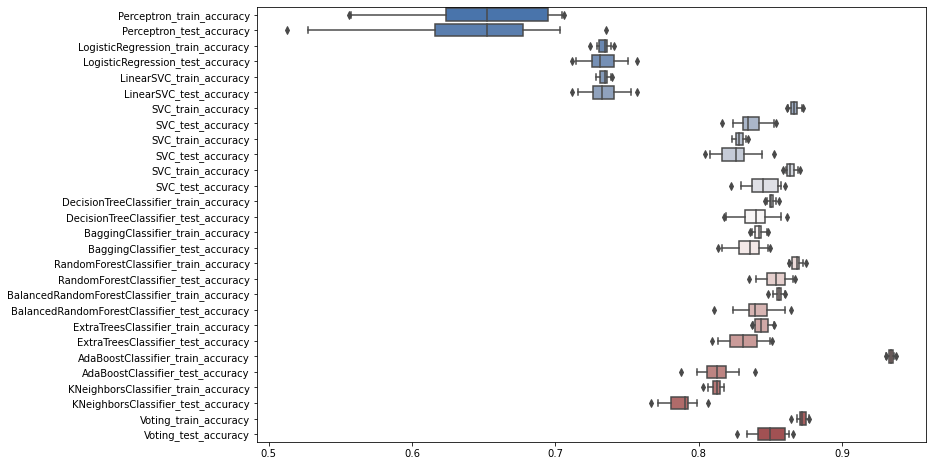

In [119]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
visualize_ensemble_performance(ax, X_train, y_train, scores, ['accuracy'])

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
visualize_ensemble_performance(ax, X_train, y_train, scores, ['precision'])

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
visualize_ensemble_performance(ax, X_train, y_train, scores, ['recall'])

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
visualize_ensemble_performance(ax, X_train, y_train, scores, ['f1'])